## Assignment - Statistical Measures
#### Submitted By : Elizabeth Raju

In [22]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Load dataset
df = pd.read_csv('StudentsPerformance.csv')

print("Dataset Preview:")
df.head()

Dataset Preview:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Q1.Calculate the mean, median, and mode for the following columns: math score, reading score, writing score. Present a table and discuss any kewness you observe from the comparison of mean and median.

In [21]:
print("\nCentral Tendency Measures")
math_mean = df['math score'].mean()
math_median = df['math score'].median()
math_mode = df['math score'].mode()[0]
reading_mean = df['reading score'].mean()
reading_median = df['reading score'].median()
reading_mode = df['reading score'].mode()[0]
writing_mean = df['writing score'].mean()
writing_median = df['writing score'].median()
writing_mode = df['writing score'].mode()[0]

# Create a table using DataFrame
central_tendency = pd.DataFrame({
    'Measure': ['Mean', 'Median', 'Mode'],
    'Math Score': [math_mean, math_median, math_mode],
    'Reading Score': [reading_mean, reading_median, reading_mode],
    'Writing Score': [writing_mean, writing_median, writing_mode]
})
print("\nTable of Central Tendency:")
print(central_tendency)



Central Tendency Measures

Table of Central Tendency:
  Measure  Math Score  Reading Score  Writing Score
0    Mean      66.089         69.169         68.054
1  Median      66.000         70.000         69.000
2    Mode      65.000         72.000         74.000


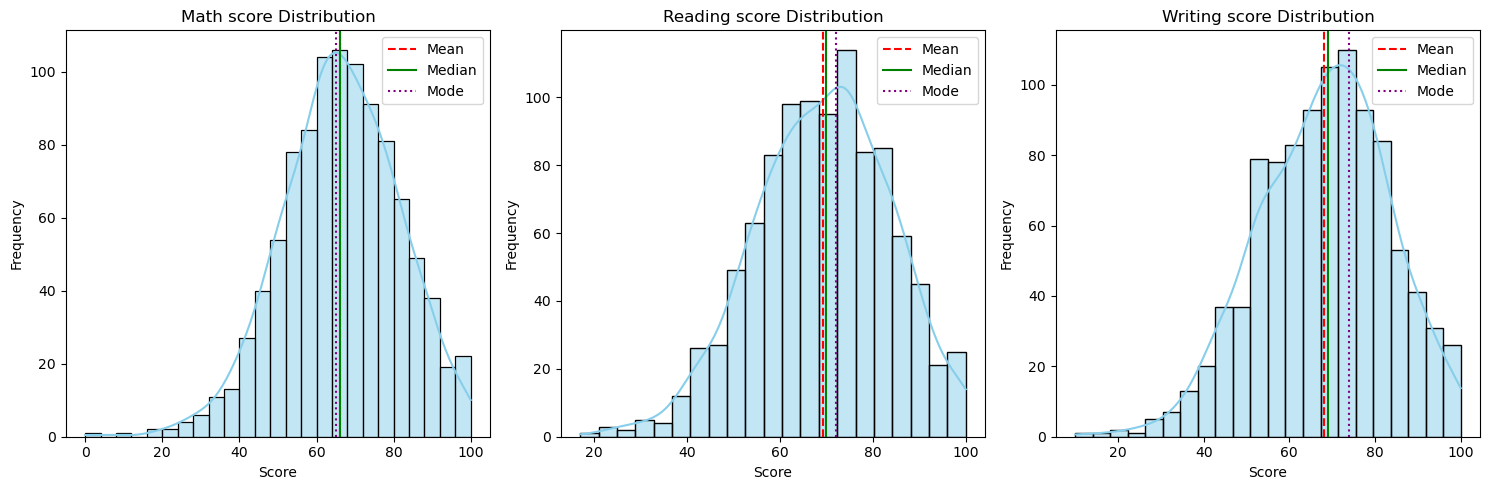

In [31]:
# Plot histograms to visualize distributions and central tendencies
plt.figure(figsize=(15, 5)),
for i, column in enumerate(['math score', 'reading score', 'writing score'], 1):
    plt.subplot(1, 3, i),
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.axvline(df[column].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(df[column].median(), color='green', linestyle='-', label='Median')
    plt.axvline(df[column].mode()[0], color='purple', linestyle=':', label='Mode')
    plt.title(f'{column.capitalize()} Distribution')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.legend()
plt.tight_layout()
plt.show()


Skewness Discussion:
Math Score: Mean (66.09) slightly > Median (66.00), suggesting mild negative skewness.
Reading Score: Mean (69.17) < Median (70.00), suggesting mild positive skewness.
Writing Score: Mean (68.05) < Median (69.00), suggesting mild positive skewness.

Q2.Compute the range, variance, and standard deviation for math score and reading score. Interpret how dispersed the values are for each subject.

In [26]:
print("\n2. Dispersion Measures")
math_range = df['math score'].max() - df['math score'].min()
math_variance = df['math score'].var(ddof=1)  # Sample variance
math_std = df['math score'].std(ddof=1)  # Sample standard deviation
reading_range = df['reading score'].max() - df['reading score'].min()
reading_variance = df['reading score'].var(ddof=1)
reading_std = df['reading score'].std(ddof=1)

# Create a table
dispersion = pd.DataFrame({
    'Measure': ['Range', 'Variance', 'Standard Deviation'],
    'Math Score': [math_range, math_variance, math_std],
    'Reading Score': [reading_range, reading_variance, reading_std]
})
print("\nTable of Dispersion:")
print(dispersion)



2. Dispersion Measures

Table of Dispersion:
              Measure  Math Score  Reading Score
0               Range  100.000000      83.000000
1            Variance  229.918998     213.165605
2  Standard Deviation   15.163080      14.600192


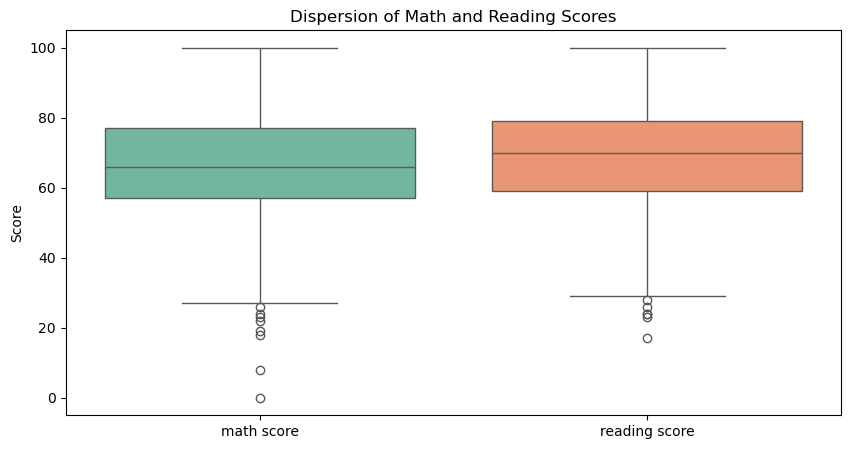

In [32]:

# Plot boxplots to visualize dispersion
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['math score', 'reading score']], palette='Set2')
plt.title('Dispersion of Math and Reading Scores')
plt.ylabel('Score')
plt.show()



Dispersion Interpretation:
Math scores (SD=15.16) are more dispersed than reading scores (SD=14.60), indicating greater variability in math performance.
The range for math (100) is wider than reading (83), showing more extreme scores in math.

Q3. Calculate the skewness and kurtosis for writing score. Interpret the distribution shape: symmetry and peakedness.

In [13]:
print("\n3. Skewness and Kurtosis for Writing Score")
writing_skew = skew(df['writing score'], bias=False)
writing_kurt = kurtosis(df['writing score'], bias=False, fisher=True)  # Fisher’s kurtosis (subtracts 3)

print("Skewness: {:.2f}".format(writing_skew))
print("Kurtosis: {:.2f}".format(writing_kurt))



3. Skewness and Kurtosis for Writing Score
Skewness: -0.29
Kurtosis: -0.03

Interpretation:
Negative skewness (-0.29) indicates a mild left tail (more lower outliers).
Negative kurtosis (-0.03) suggests a platykurtic distribution, flatter than normal with fewer central scores.


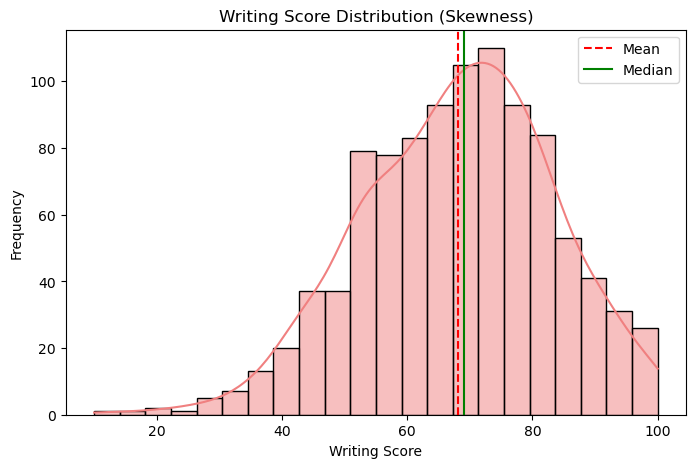

In [33]:
#Plot histogram with KDE for writing score to visualize skewness
plt.figure(figsize=(8, 5))
sns.histplot(df['writing score'], kde=True, color='lightcoral')
plt.axvline(df['writing score'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['writing score'].median(), color='green', linestyle='-', label='Median')
plt.title('Writing Score Distribution (Skewness)')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Q4. For math score, compute: Identify outliers using IQR and count how many outliers exist.

In [14]:

print("\nOutliers in Math Score (IQR Method)")
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR
outliers = df['math score'][(df['math score'] < lower_fence) | (df['math score'] > upper_fence)]
num_outliers = len(outliers)

print("Q1: {}, Q3: {}, IQR: {}".format(Q1, Q3, IQR))
print("Lower Fence: {:.2f}, Upper Fence: {:.2f}".format(lower_fence, upper_fence))
print("Number of Outliers: {}".format(num_outliers))
print("Outlier Values:", outliers.values)


4. Outliers in Math Score (IQR Method)
Q1: 57.0, Q3: 77.0, IQR: 20.0
Lower Fence: 27.00, Upper Fence: 107.00
Number of Outliers: 8
Outlier Values: [18  0 22 24 26 19 23  8]


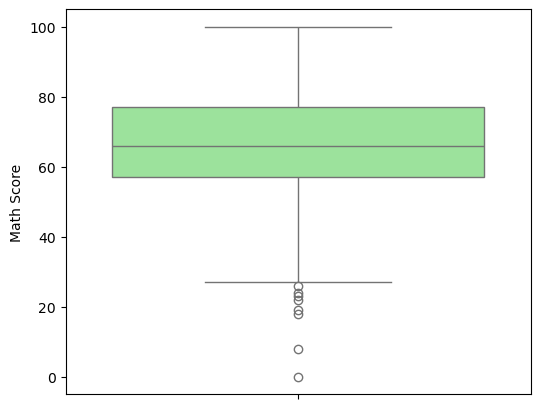

In [34]:
# Plot boxplot for math score to highlight outliers
plt.figure(figsize=(6, 5))
sns.boxplot(y=df['math score'], color='lightgreen')
plt.ylabel('Math Score')
plt.show()

Q5. Compute the Pearson correlation coefficient among math score, readingscore, and writing score. Which pair of subjects shows the strongest correlation?

In [36]:
print("\nPearson Correlation Coefficients")
correlation_matrix = df[['math score', 'reading score', 'writing score']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Pearson Correlation Coefficients

Correlation Matrix:
               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


In [37]:
# Identify strongest correlation
max_corr = correlation_matrix.unstack().sort_values(ascending=False)
max_corr = max_corr[max_corr < 1.0].index[0]  # Exclude self-correlations (1.0)
print("\nStrongest Correlation:")
print("Between {} and {}: {:.2f}".format(max_corr[0], max_corr[1], correlation_matrix.loc[max_corr[0], max_corr[1]]))
print("Reading and writing scores show the strongest correlation, indicating shared skills like comprehension.")


Strongest Correlation:
Between reading score and writing score: 0.95
Reading and writing scores show the strongest correlation, indicating shared skills like comprehension.


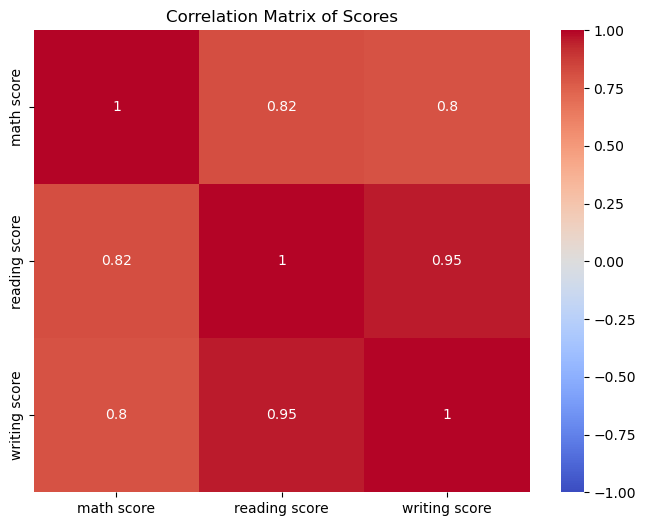

In [38]:
# Plot heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Scores')
plt.show()